## Pratique visualisation avec Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importation du dataset

from sklearn.datasets import load_boston

#Mettre dans un dataframe
dataset  = load_boston()
boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston['MEDV'] = dataset.target

In [2]:
#afficher une partie du dataframe
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#verifier la présence de NaN
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#description stats sur la cible target
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

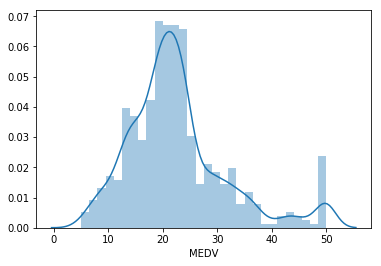

In [9]:
#distribution de la cible histogramme
sns.distplot(boston['MEDV'], bins= 30, kde=True)
plt.show()


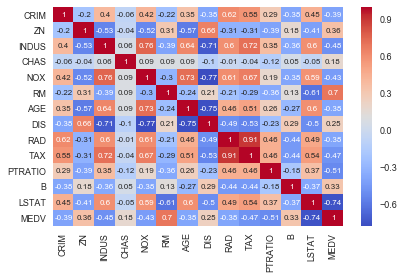

In [12]:
#correlation entre les différents éléments du dataset
sns.set(style="white", font_scale = 0.9)
sns.heatmap(data= boston.corr().round(2), cmap='coolwarm', annot=True,
          annot_kws={"size":8} )
plt.tight_layout()
plt.show()

In [14]:
#valider la correlation entre des descripteurs et la cible target
#MEDV et RM sont fortement corrélés ?
df = pd.DataFrame(boston, columns=['RM', 'MEDV'])
df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


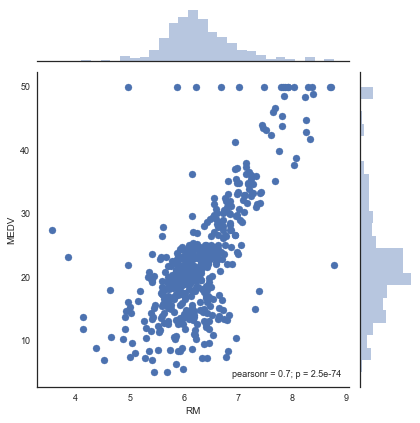

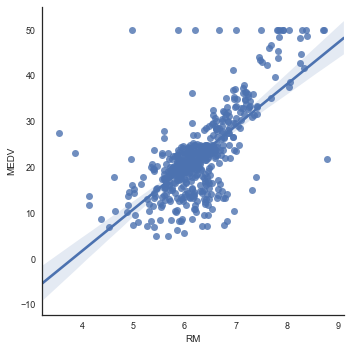

In [17]:
#obtenir et tracer la correlation
sns.jointplot(y='MEDV', x= 'RM', data=df)
#obtenir la tendance lineaire si possible
sns.lmplot(y='MEDV', x= 'RM', data=df)